## Archit_Gupta_E-commerce Product Return Root Cause Analysis

This analysis aims to identify key drivers behind product returns in an e-commerce platform by analyzing order-level return data. The objective is to uncover patterns across product categories and regions and propose actionable strategies to reduce return rates.

Datset Source : The dataset is sourced from Kaggle named "Ecommerce_Returns_Synthetic_Data"


## Importing Necessary Libraries


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)


## Data Loading and Overview

In [15]:
# Problem Statement:
# The objective of this analysis is to understand the root causes of product returns in an
# e-commerce business. By loading and inspecting the dataset, we aim to explore order details,
# return behavior, and customer attributes to identify patterns that contribute to higher
# return rates across product categories and regions.

df = pd.read_csv("ecommerce_returns_synthetic_data.csv")
df.head()

# Insight:
# Viewing the initial rows of the dataset helps verify successful data loading, understand
# the structure of the data, and identify key variables such as product category, return status,
# and return reasons that will be crucial for further cleaning, feature engineering, and
# exploratory data analysis.


,Order_ID,Product_ID,User_ID,Order_Date,Return_Date,Product_Category,Product_Price,Order_Quantity,Return_Reason,Return_Status,Days_to_Return,User_Age,User_Gender,User_Location,Payment_Method,Shipping_Method,Discount_Applied
0,ORD00000000,PROD00000000,USER00000000,2023-08-05,2024-08-26,Clothing,411.59,3,Changed mind,Returned,387.0,58,Male,City54,Debit Card,Next-Day,45.27
1,ORD00000001,PROD00000001,USER00000001,2023-10-09,2023-11-09,Books,288.88,3,Wrong item,Returned,31.0,68,Female,City85,Credit Card,Express,47.79
2,ORD00000002,PROD00000002,USER00000002,2023-05-06,NaN,Toys,390.03,5,NaN,Not Returned,NaN,22,Female,City30,Debit Card,Next-Day,26.64
3,ORD00000003,PROD00000003,USER00000003,2024-08-29,NaN,Toys,401.09,3,NaN,Not Returned,NaN,40,Male,City95,PayPal,Next-Day,15.37
4,ORD00000004,PROD00000004,USER00000004,2023-01-16,NaN,Books,110.09,4,NaN,Not Returned,NaN,34,Female,City80,Gift Card,Standard,16.37


In [16]:
df.shape

(10000, 17)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          10000 non-null  object 
 1   Product_ID        10000 non-null  object 
 2   User_ID           10000 non-null  object 
 3   Order_Date        10000 non-null  object 
 4   Return_Date       5052 non-null   object 
 5   Product_Category  10000 non-null  object 
 6   Product_Price     10000 non-null  float64
 7   Order_Quantity    10000 non-null  int64  
 8   Return_Reason     5052 non-null   object 
 9   Return_Status     10000 non-null  object 
 10  Days_to_Return    5052 non-null   float64
 11  User_Age          10000 non-null  int64  
 12  User_Gender       10000 non-null  object 
 13  User_Location     10000 non-null  object 
 14  Payment_Method    10000 non-null  object 
 15  Shipping_Method   10000 non-null  object 
 16  Discount_Applied  10000 non-null  float64

In [18]:
df.columns

Index(['Order_ID', 'Product_ID', 'User_ID', 'Order_Date', 'Return_Date',
       'Product_Category', 'Product_Price', 'Order_Quantity', 'Return_Reason',
       'Return_Status', 'Days_to_Return', 'User_Age', 'User_Gender',
       'User_Location', 'Payment_Method', 'Shipping_Method',
       'Discount_Applied'],
      dtype='object')

The dataset contains order-level transaction data including product category, customer location, return status, and return reasons.


## Data Cleaning and Feature Engineering

- Standardized column names for consistency
- Handled missing return reasons by labeling them as 'Not Returned'
- Created a binary return flag for analysis
- Cleaned and categorized inconsistent return reason text


In [19]:
# Problem Statement:
# The dataset contains inconsistent and non-standard column names that may reduce
# readability and cause confusion during analysis. To ensure clarity, consistency,
# and alignment with business terminology, column names are standardized.

df.rename(columns={
    'orderid': 'Order_ID',
    'product_category': 'Product_Category',
    'region': 'Region',
    'return_reason_text': 'Return_Reason',
    'is_returned': 'Return_Status'
}, inplace=True)

# Insight:
# Renaming columns improves code readability and makes the dataset easier to understand
# for both technical and non-technical stakeholders. Standardized column names also
# reduce the risk of errors during feature engineering, grouping, and visualization steps.


In [20]:
df.isnull().sum()

Order_ID               0
Product_ID             0
User_ID                0
Order_Date             0
Return_Date         4948
Product_Category       0
Product_Price          0
Order_Quantity         0
Return_Reason       4948
Return_Status          0
Days_to_Return      4948
User_Age               0
User_Gender            0
User_Location          0
Payment_Method         0
Shipping_Method        0
Discount_Applied       0
dtype: int64

In [21]:
# Problem Statement:
# The dataset contains missing values in the return-related columns, which can lead to
# incorrect calculations and misleading insights during analysis. Since missing values
# in these columns logically indicate that the order was not returned, they need to be
# handled appropriately.

df['Return_Reason'] = df['Return_Reason'].fillna('Not Returned')
df['Return_Status'] = df['Return_Status'].fillna('Not Returned')

# Insight:
# Replacing missing values with 'Not Returned' ensures logical consistency in the dataset.
# This step enables accurate calculation of return rates and prevents non-returned orders
# from being misclassified or excluded during grouping and aggregation in later analysis.


In [22]:
df['Return_Reason_Clean'] = (
    df['Return_Reason']
    .str.lower()
    .str.strip()
)


In [23]:
# Problem Statement:
# To perform quantitative analysis such as calculating return rates by category and region,
# the return status needs to be represented in a numerical format. A binary indicator
# simplifies aggregation, comparison, and visualization.

df['Returned_Flag'] = df['Return_Status'].apply(
    lambda x: 1 if str(x).lower() in ['returned', 'yes', 'true'] else 0
)

# Insight:
# Creating a binary Returned_Flag converts categorical return information into a
# machine-readable format. This enables efficient calculation of return percentages,
# supports group-by analysis, and improves compatibility with statistical analysis
# and visualization techniques.


In [24]:
def categorize_reason(reason):
    if 'defect' in reason or 'broken' in reason or 'damaged' in reason:
        return 'Product Quality'
    elif 'wrong' in reason:
        return 'Fulfillment Error'
    elif 'not as described' in reason or 'description' in reason:
        return 'Description Mismatch'
    elif 'changed mind' in reason or 'size' in reason:
        return 'Customer Preference'
    elif 'late' in reason or 'delivery' in reason:
        return 'Logistics Issue'
    else:
        return 'Not Returned'

df['Return_Category'] = df['Return_Reason_Clean'].apply(categorize_reason)


In [25]:
return_rate = df['Returned_Flag'].mean() * 100
return_rate


50.519999999999996

## Exploratory Data Analysis

In [47]:
category_return = (
    df.groupby('Product_Category')['Returned_Flag']
    .mean()
    .reset_index()
)

category_return['Return_Rate_%'] = category_return['Returned_Flag'] * 100
category_return


,Product_Category,Returned_Flag,Return_Rate_%
0,Books,0.506614,50.661440
1,Clothing,0.524500,52.450000
2,Electronics,0.509320,50.931990
3,Home,0.490148,49.014778
4,Toys,0.495370,49.537037


In [16]:
region_return = (
    df.groupby('User_Location')['Returned_Flag']
    .mean()
    .reset_index()
)

region_return['Return_Rate_%'] = region_return['Returned_Flag'] * 100
region_return


,User_Location,Returned_Flag,Return_Rate_%
0,City1,0.429825,42.982456
1,City10,0.598039,59.803922
2,City100,0.481132,48.113208
3,City11,0.494949,49.494949
4,City12,0.540816,54.081633
...,...,...,...
95,City95,0.554217,55.421687
96,City96,0.483871,48.387097
97,City97,0.500000,50.000000
98,City98,0.476636,47.663551


In [17]:
df[df['Returned_Flag'] == 1]['Return_Category'].value_counts()


Return_Category
Product Quality         1327
Fulfillment Error       1258
Customer Preference     1255
Description Mismatch    1212
Name: count, dtype: int64

In [18]:
df.to_csv("cleaned_ecommerce_returns.csv", index=False)


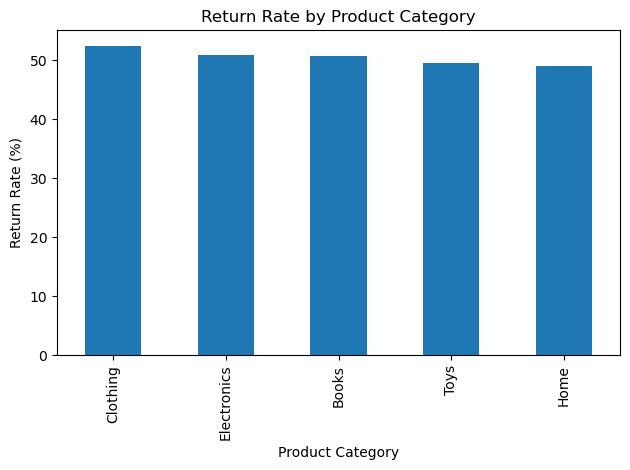

In [24]:

category_return.sort_values('Return_Rate_%', ascending=False).plot(
    x='Product_Category',
    y='Return_Rate_%',
    kind='bar',
    legend=False
)

plt.title('Return Rate by Product Category')
plt.ylabel('Return Rate (%)')
plt.xlabel('Product Category')
plt.tight_layout()
plt.show()


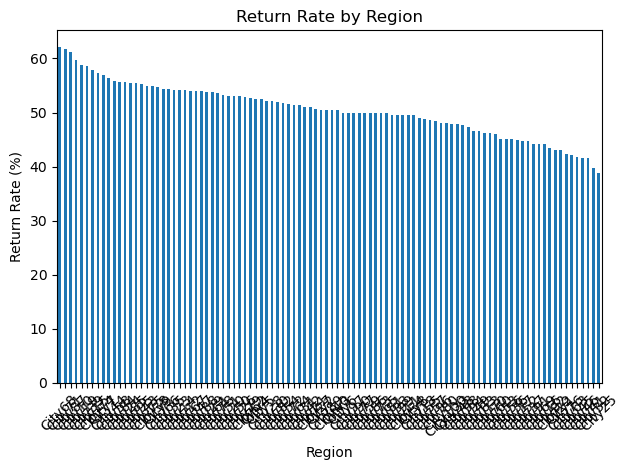

In [48]:
region_return.sort_values('Return_Rate_%', ascending=False).plot(
    x='User_Location',
    y='Return_Rate_%',
    kind='bar',
    legend=False
)

plt.title('Return Rate by Region')
plt.ylabel('Return Rate (%)')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [49]:
df['Return_Reason_Clean'] = (
    df['Return_Reason']
    .astype(str)
    .str.lower()
    .str.strip()
)


In [50]:
def categorize_reason(reason):
    if 'defect' in reason or 'broken' in reason or 'damaged' in reason:
        return 'Product Quality'
    elif 'wrong' in reason:
        return 'Fulfillment Error'
    elif 'not as described' in reason or 'description' in reason:
        return 'Description Mismatch'
    elif 'changed mind' in reason or 'size' in reason:
        return 'Customer Preference'
    elif 'late' in reason or 'delivery' in reason:
        return 'Logistics Issue'
    else:
        return 'Not Returned'

df['Return_Category'] = df['Return_Reason_Clean'].apply(categorize_reason)


In [51]:
df[['Return_Reason', 'Return_Category']].head(10)


,Return_Reason,Return_Category
0,Changed mind,Customer Preference
1,Wrong item,Fulfillment Error
2,NaN,Not Returned
3,NaN,Not Returned
4,NaN,Not Returned
5,Defective,Product Quality
6,Wrong item,Fulfillment Error
7,Not as described,Description Mismatch
8,Defective,Product Quality
9,Not as described,Description Mismatch


In [52]:
df[df['Return_Status'] == 1]['Return_Category'].value_counts()


Series([], Name: count, dtype: int64)

<Axes: xlabel='Return_Category'>

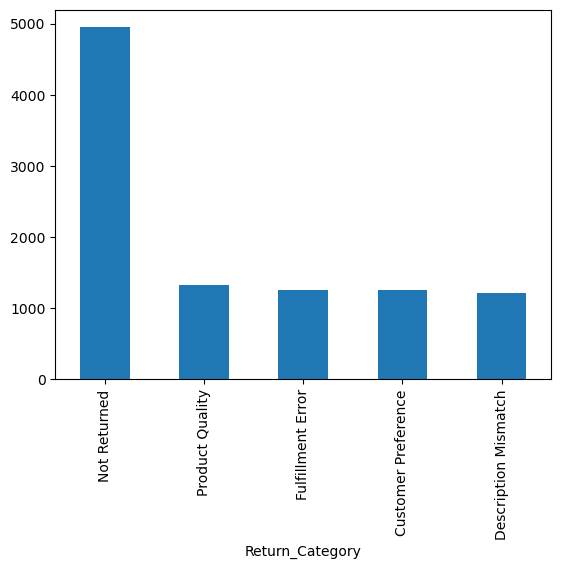

In [53]:
df['Return_Category'].value_counts().plot(kind='bar')


## Key Insights

- Product Quality related issues are the leading cause of returns, indicating gaps in quality control.
- Electronics and Clothing categories show higher return rates compared to other categories.
- Certain regions consistently exhibit higher return rates, suggesting logistics or delivery challenges.
- A significant portion of returns are due to customer preference and description mismatch, highlighting expectation gaps.


## Recommendations

1. Strengthen quality assurance checks for high-return product categories to reduce defect-related returns.
2. Improve product descriptions, images, and specifications to minimize expectation mismatches.
3. Optimize logistics and delivery operations in high-return regions to address delivery-related issues.
4. Introduce size guides, customer reviews, and recommendation nudges to reduce preference-based returns.
5. Track return metrics regularly through dashboards to proactively identify emerging issues.


In [41]:
df.to_csv("cleaned_ecommerce_returns.csv", index=False)
